In [126]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os,sys
import lux
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [127]:
data=pd.read_csv('parkinsons.csv')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [128]:
data.shape

(195, 24)

In [129]:
 #preprocessing
data.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [130]:
data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [131]:
#finding unique values

for i in data.columns:
  print('\n'+i+'\n')
  print(set(data[i].tolist()))


name

{'phon_R01_S44_6', 'phon_R01_S18_1', 'phon_R01_S21_5', 'phon_R01_S22_5', 'phon_R01_S32_2', 'phon_R01_S33_6', 'phon_R01_S39_4', 'phon_R01_S25_6', 'phon_R01_S18_3', 'phon_R01_S37_1', 'phon_R01_S16_3', 'phon_R01_S06_1', 'phon_R01_S26_1', 'phon_R01_S20_1', 'phon_R01_S37_6', 'phon_R01_S06_4', 'phon_R01_S17_6', 'phon_R01_S27_4', 'phon_R01_S49_5', 'phon_R01_S18_4', 'phon_R01_S22_2', 'phon_R01_S10_3', 'phon_R01_S50_2', 'phon_R01_S02_6', 'phon_R01_S07_4', 'phon_R01_S35_5', 'phon_R01_S25_4', 'phon_R01_S04_5', 'phon_R01_S07_5', 'phon_R01_S20_6', 'phon_R01_S16_2', 'phon_R01_S21_1', 'phon_R01_S39_3', 'phon_R01_S27_2', 'phon_R01_S49_3', 'phon_R01_S01_1', 'phon_R01_S42_3', 'phon_R01_S42_1', 'phon_R01_S34_4', 'phon_R01_S10_6', 'phon_R01_S06_5', 'phon_R01_S06_2', 'phon_R01_S16_1', 'phon_R01_S37_5', 'phon_R01_S16_4', 'phon_R01_S20_4', 'phon_R01_S21_6', 'phon_R01_S18_2', 'phon_R01_S27_7', 'phon_R01_S10_1', 'phon_R01_S07_1', 'phon_R01_S24_6', 'phon_R01_S05_6', 'phon_R01_S43_4', 'phon_R01_S19_3', 'p

Axes(0.125,0.11;0.775x0.77)


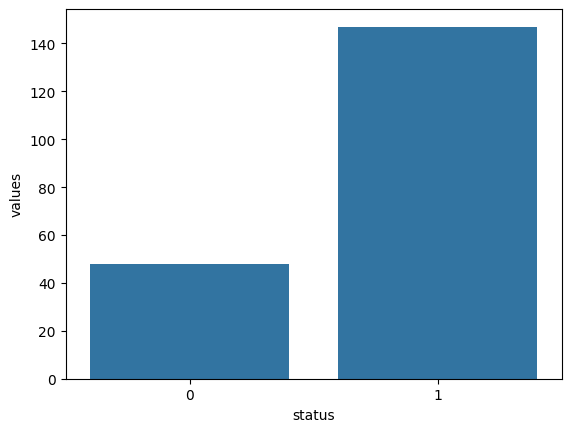

In [132]:
#label imbalance
import matplotlib.pyplot as plt
import seaborn as sns
temp=data['status'].value_counts()
temp_dataframe=pd.DataFrame({'status':temp.index,'values':temp.values})
print(sns.barplot(x='status',y='values',data=temp_dataframe))

In [133]:
# sns.pairplot(data)

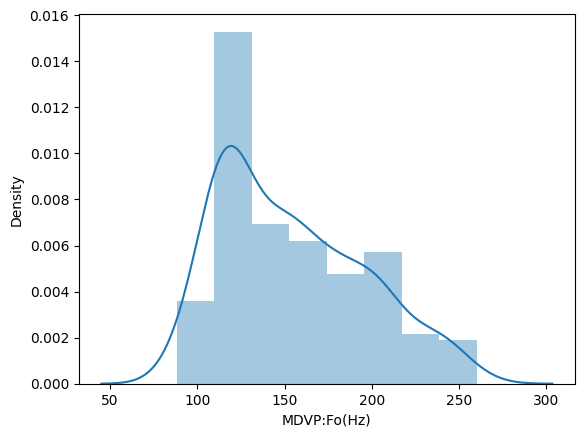

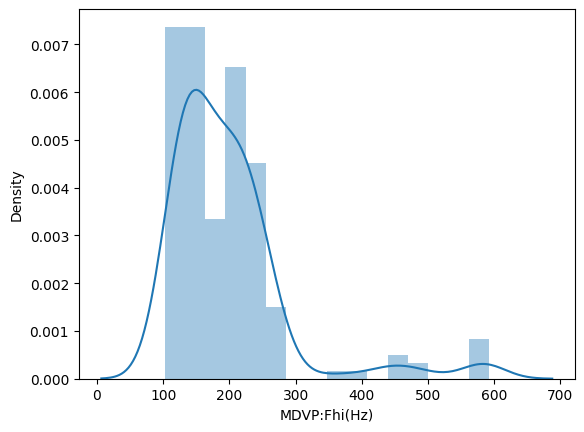

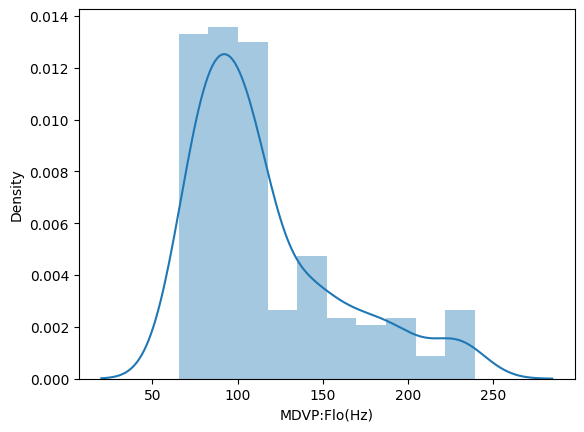

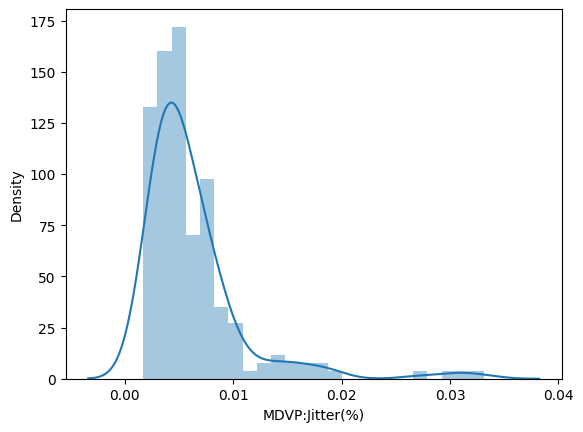

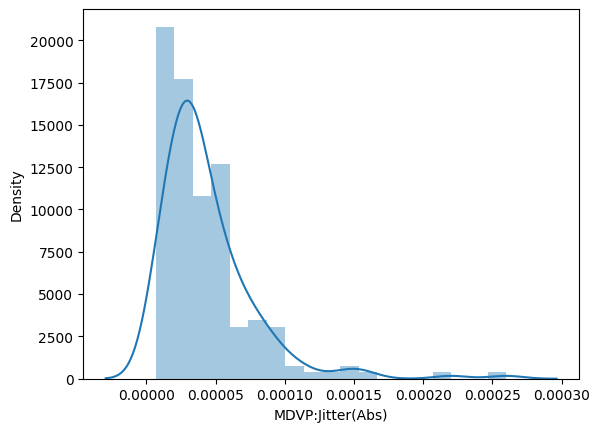

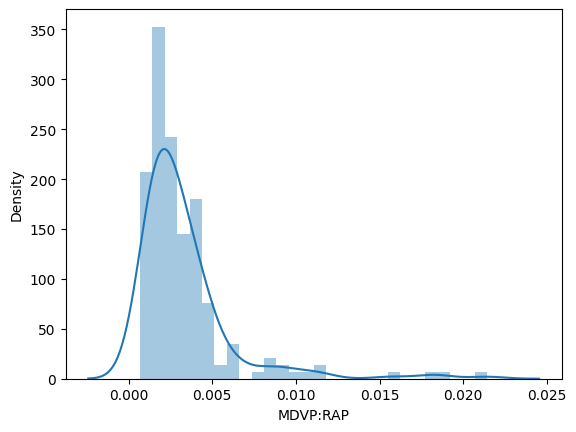

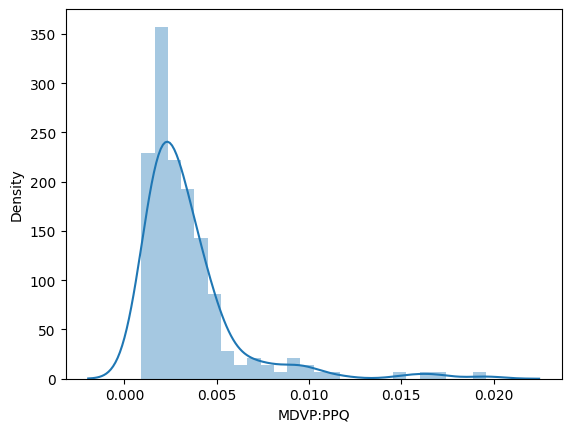

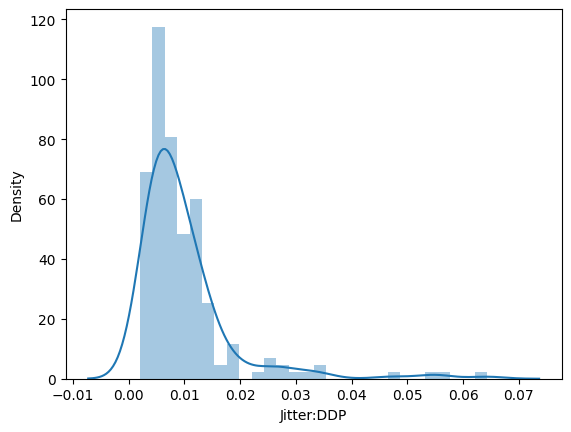

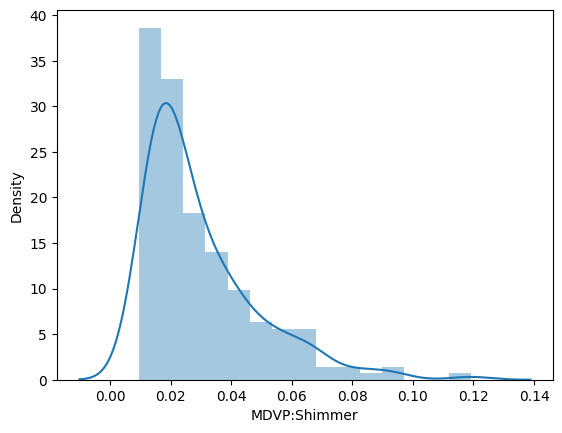

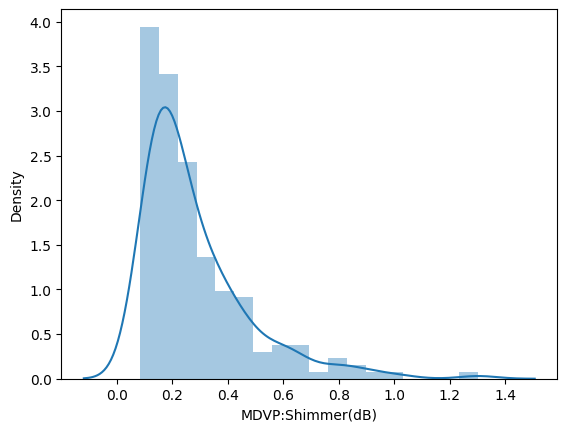

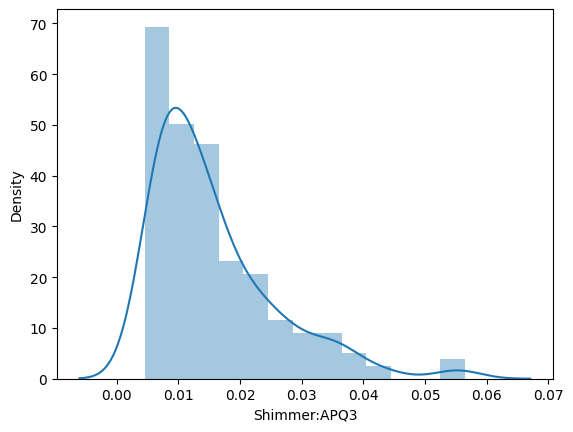

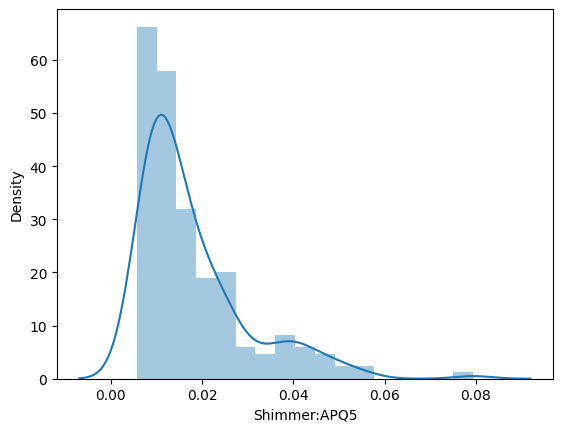

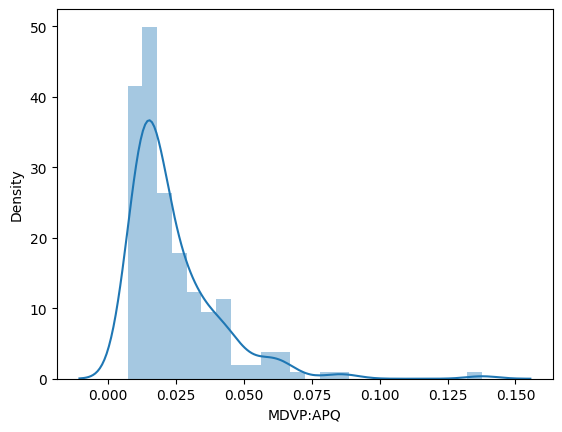

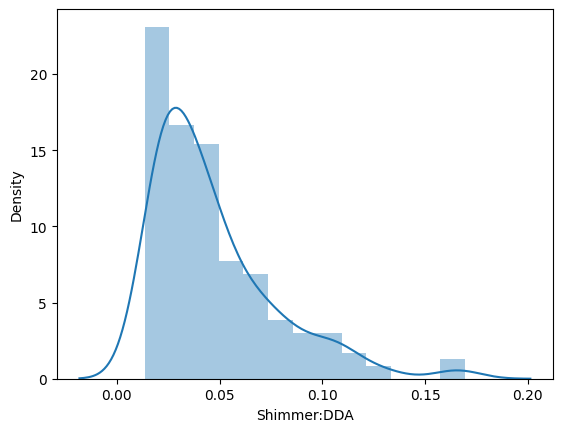

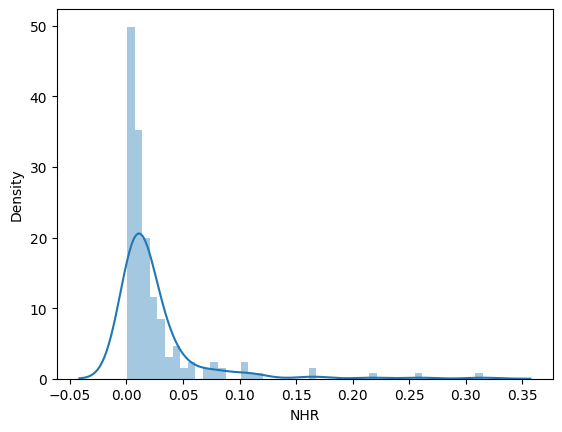

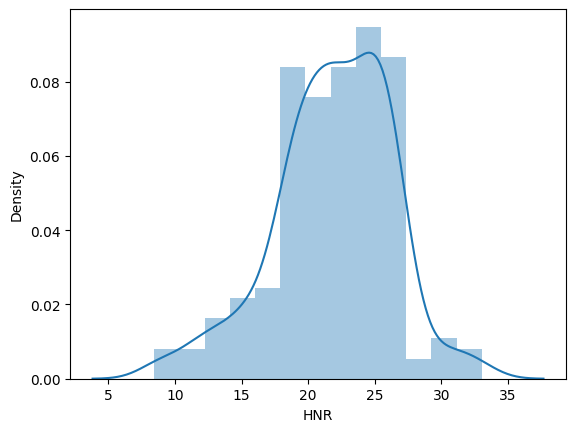

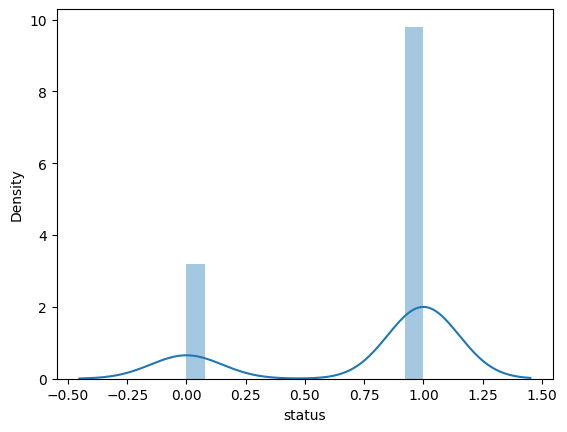

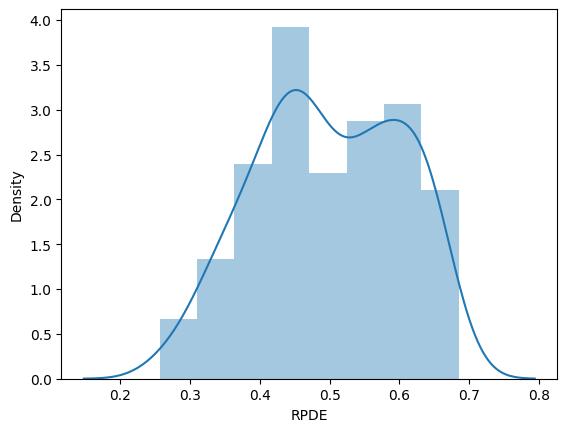

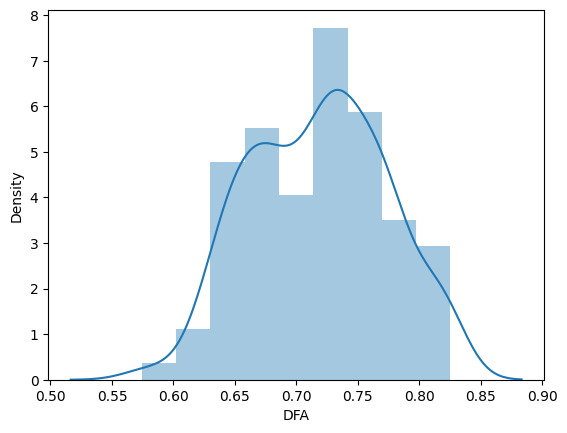

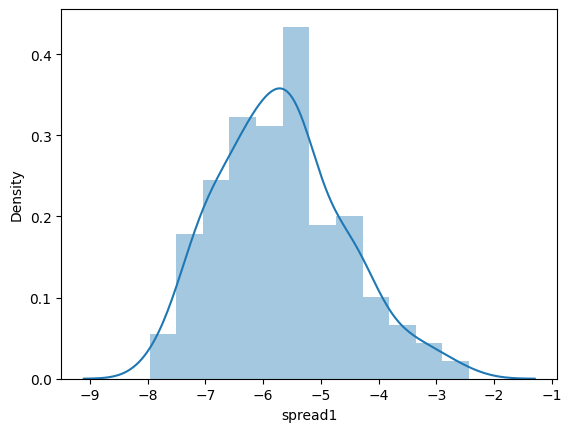

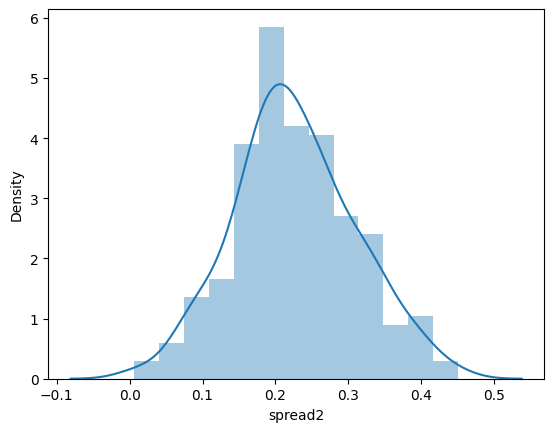

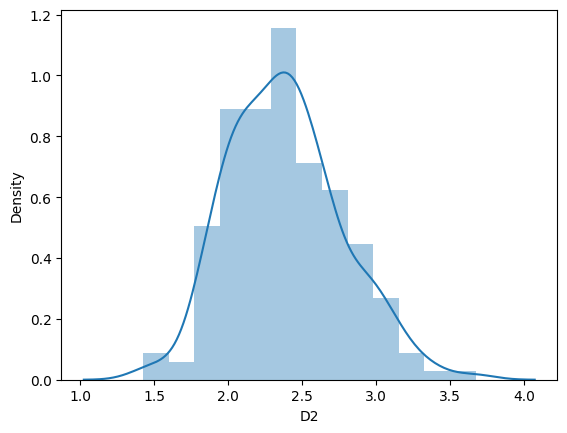

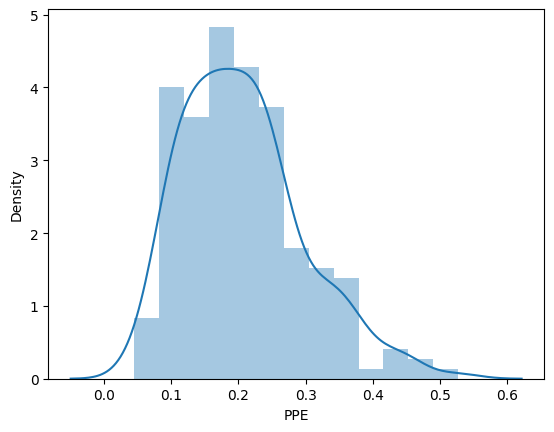

In [134]:
#distribution of individual columns

def distplots(col):
  sns.distplot(data[col])
  plt.show()
for i in list(data.columns)[1:]:
    distplots(i)

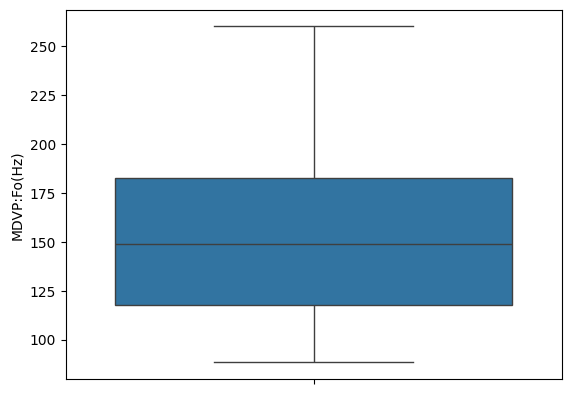

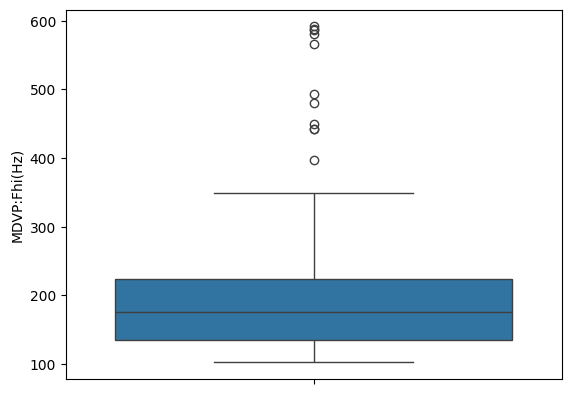

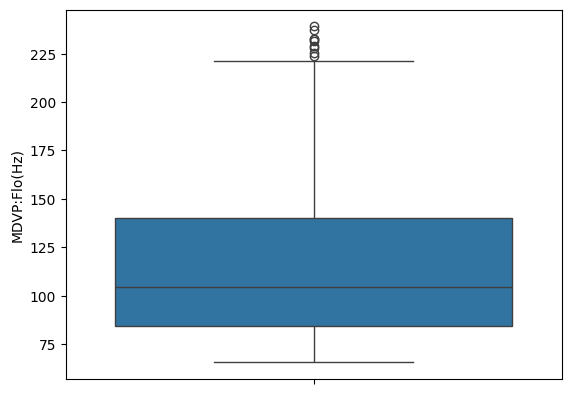

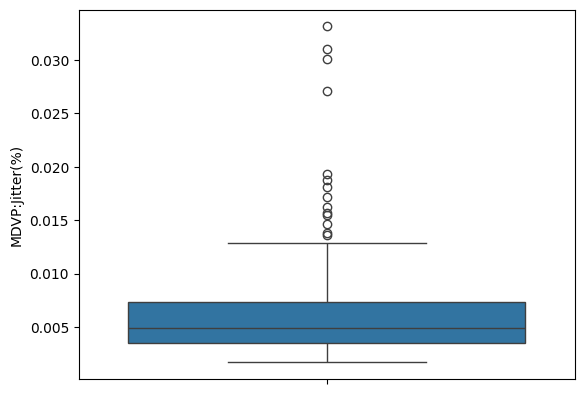

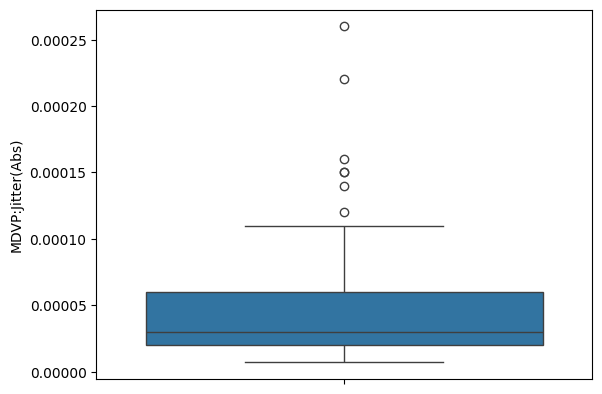

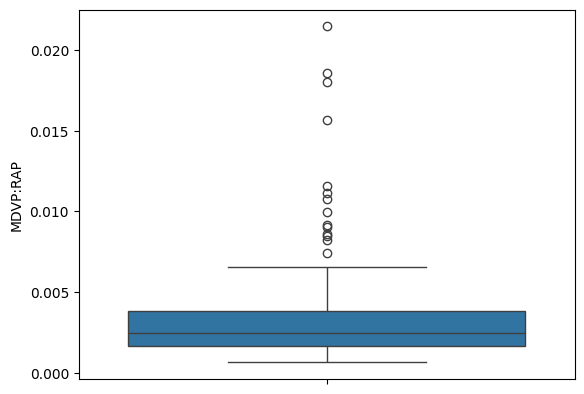

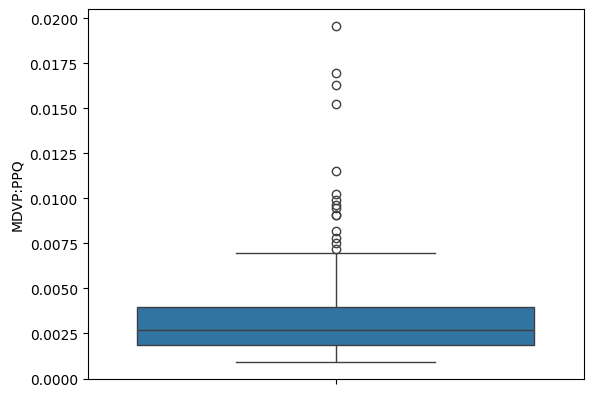

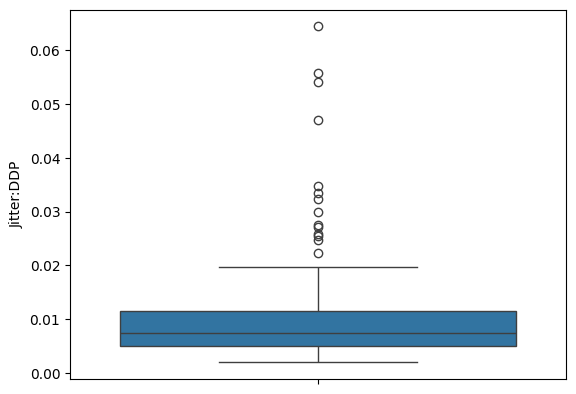

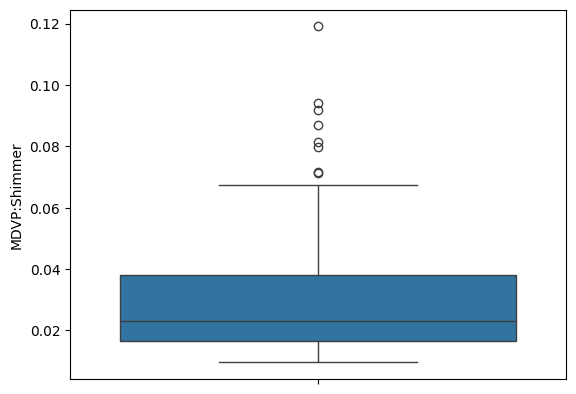

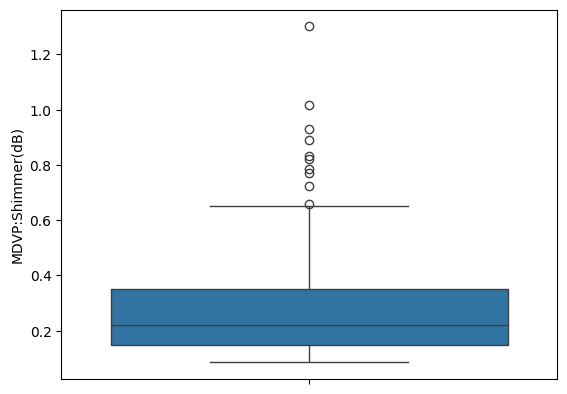

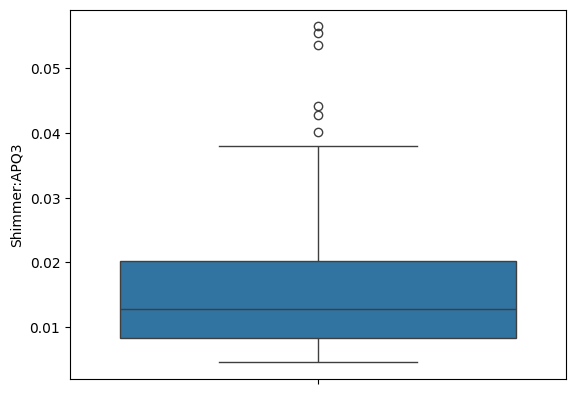

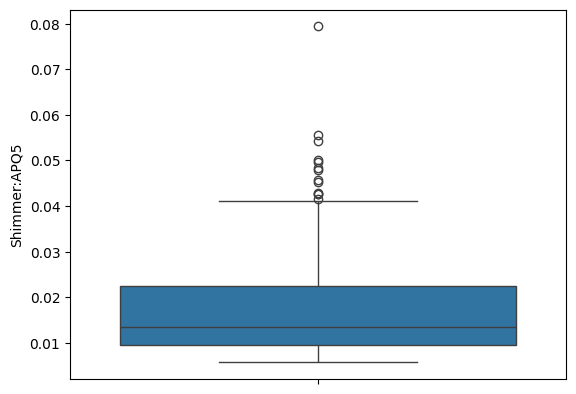

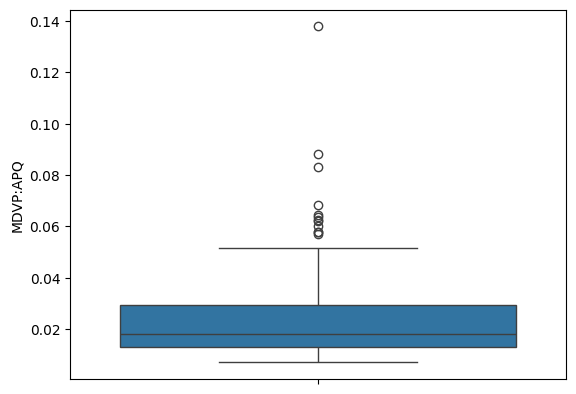

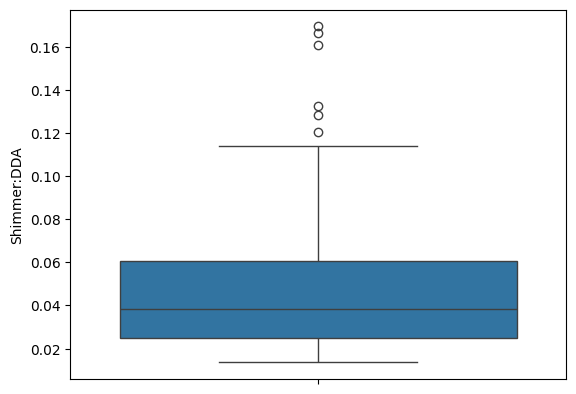

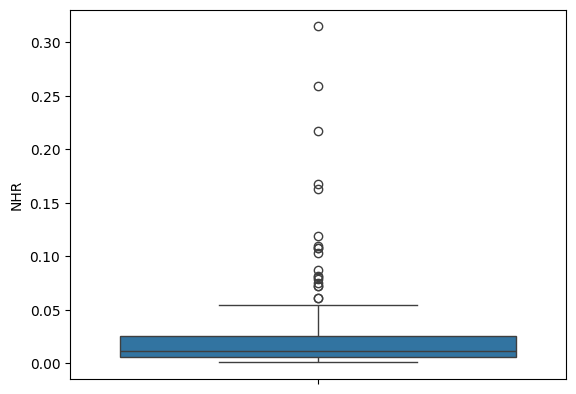

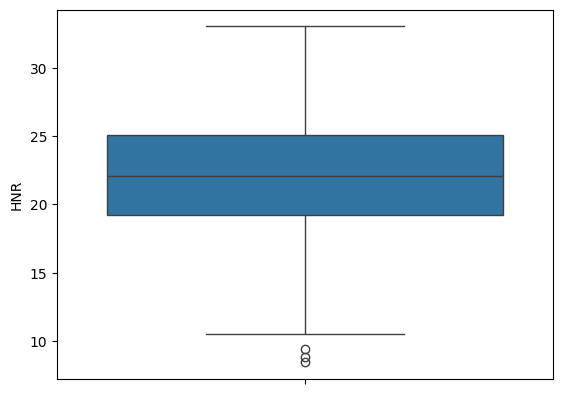

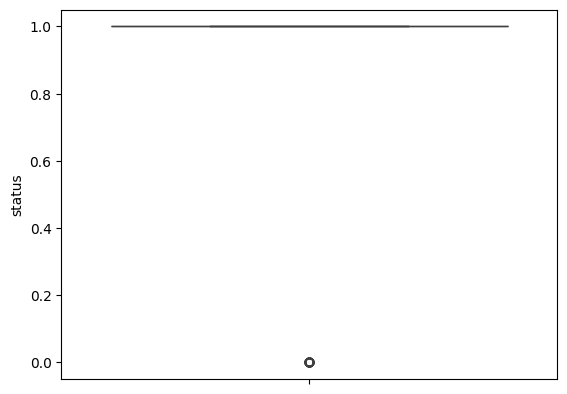

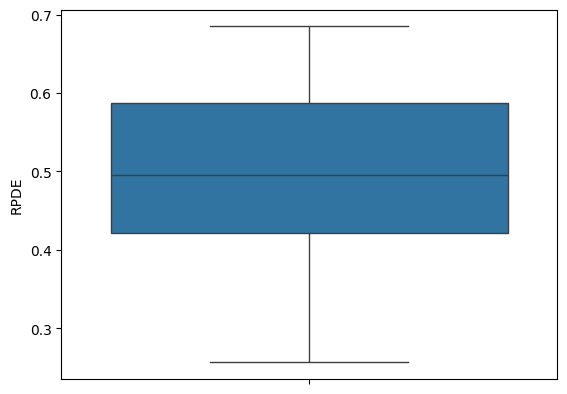

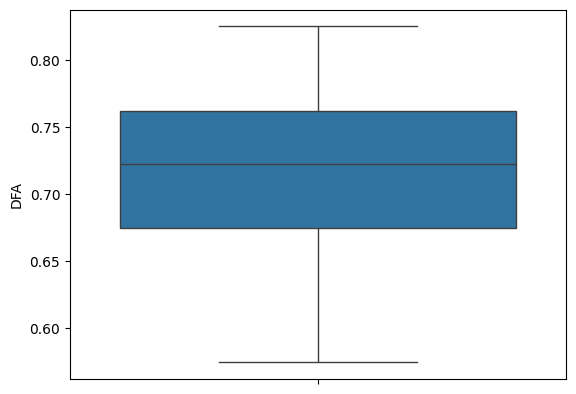

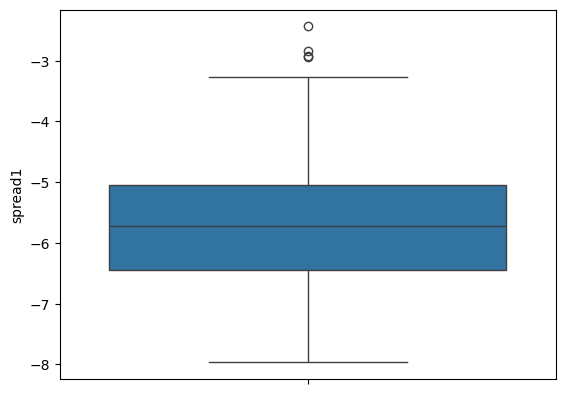

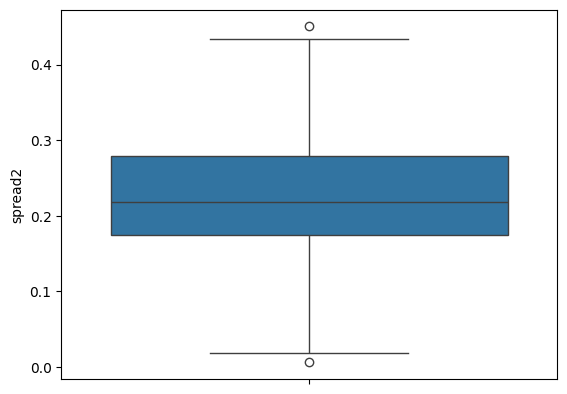

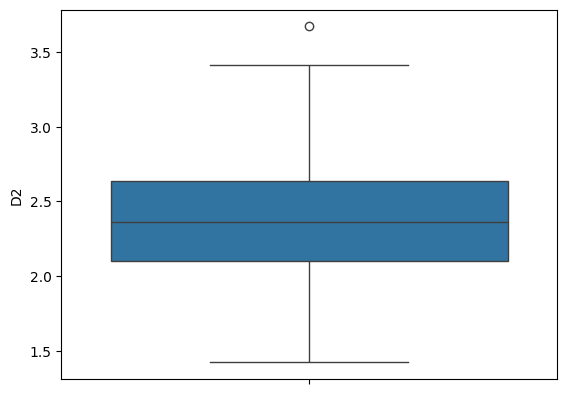

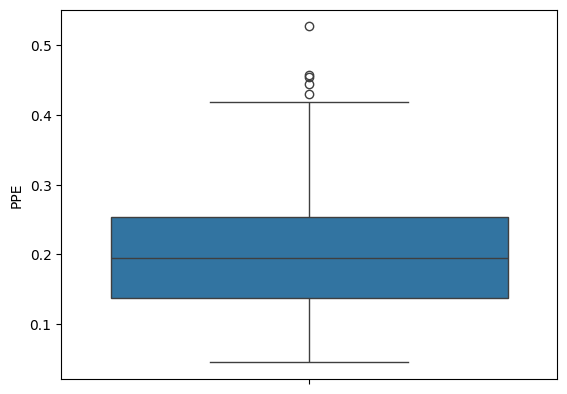

In [135]:
#outlier detection

def boxplots(col):
    sns.boxplot(data[col])
    plt.show()

for i in list(data.select_dtypes(exclude=["object"]).columns):
    boxplots(i)

<Axes: >

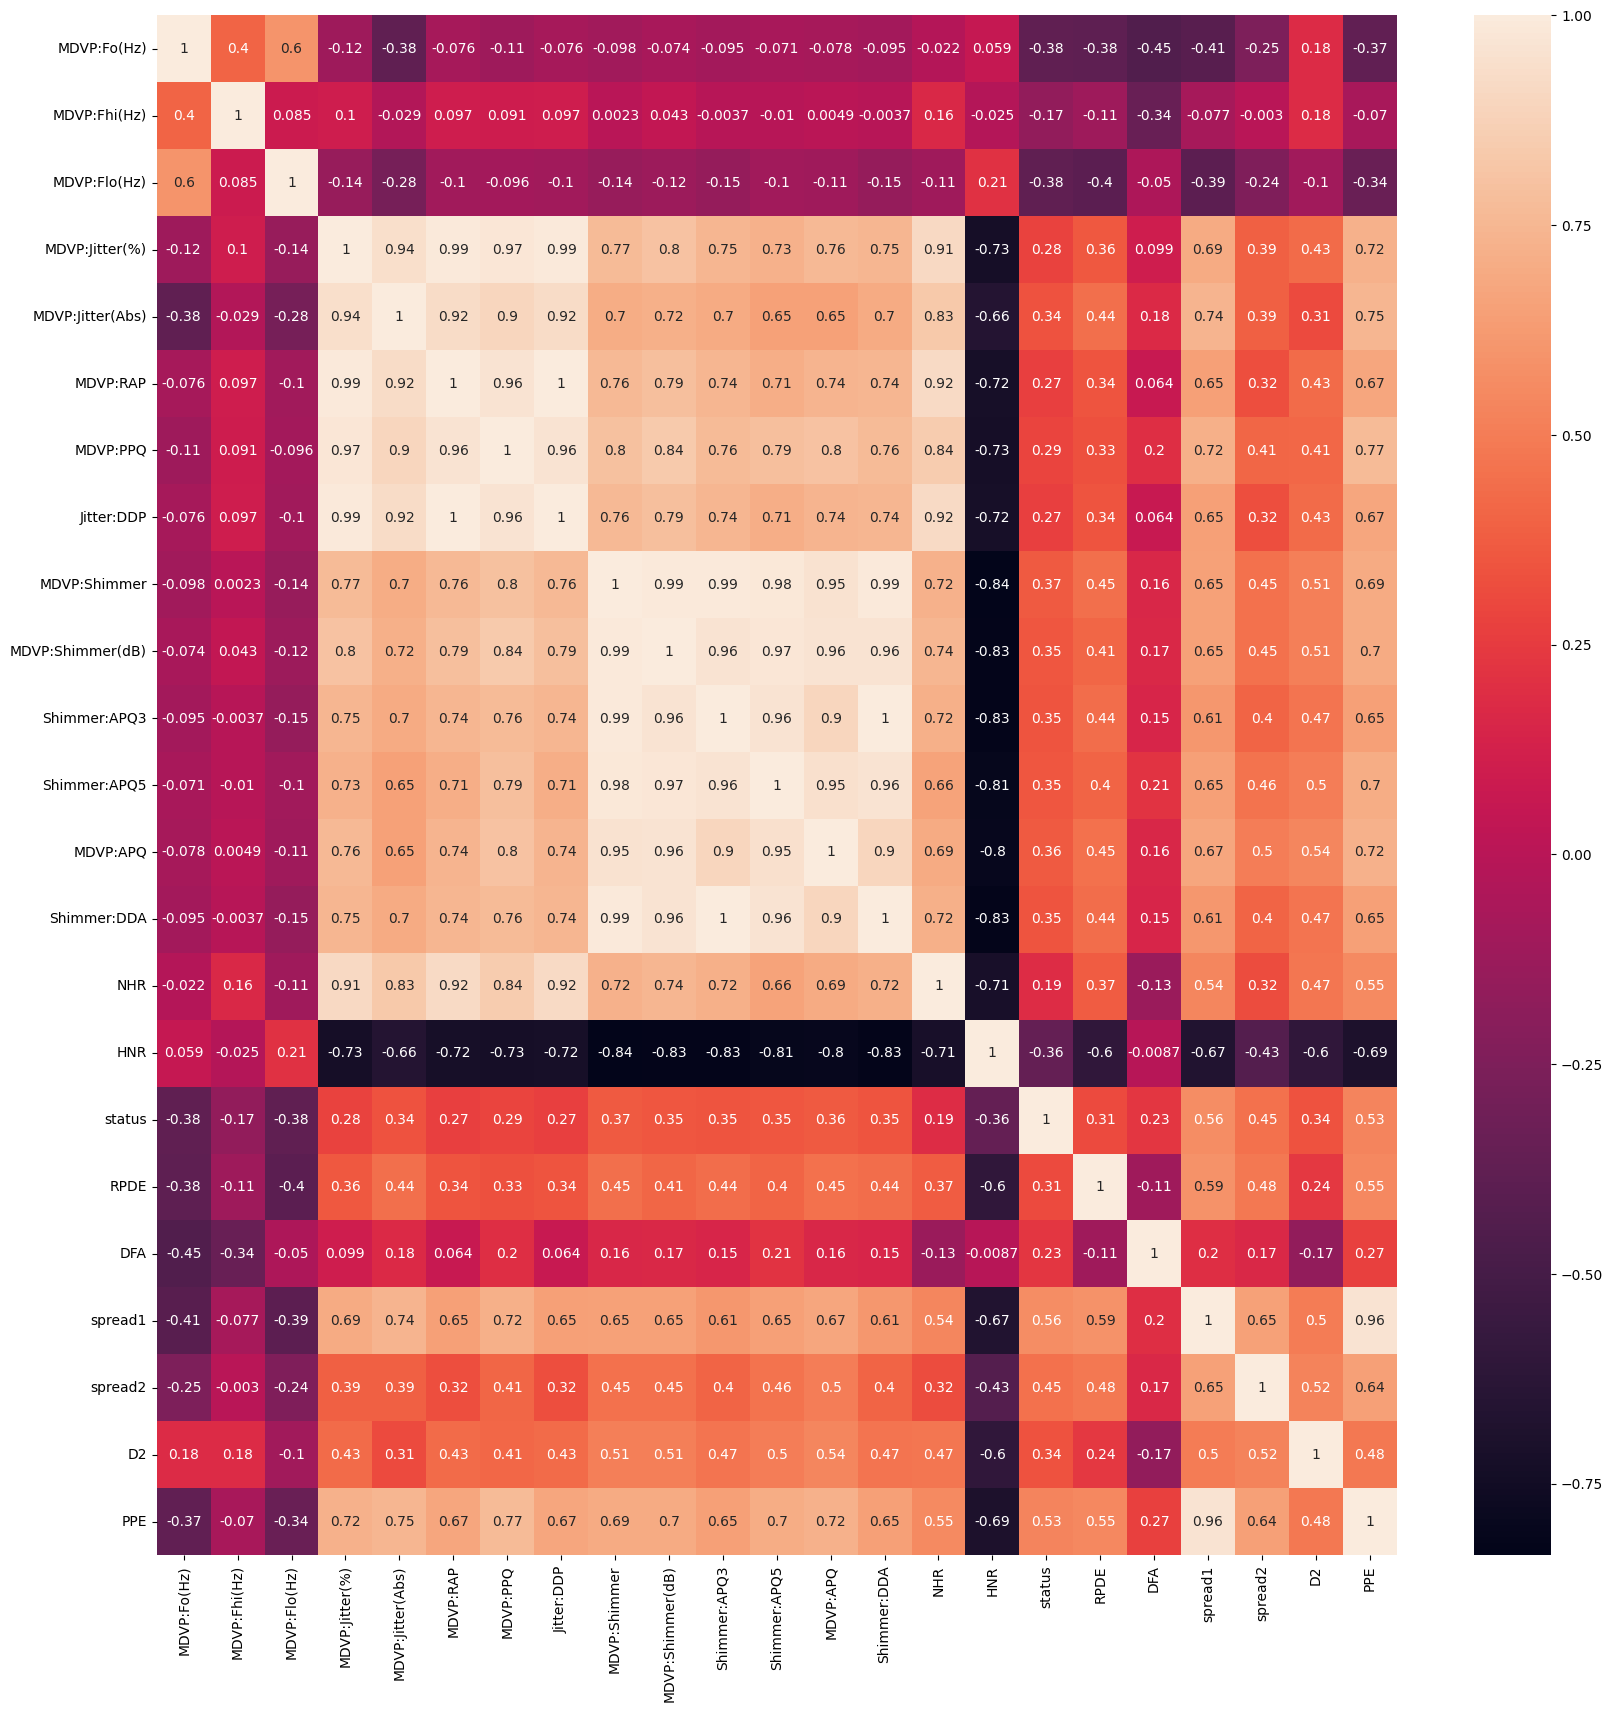

In [136]:
#correlations
plt.figure(figsize=(20,20))
sns.heatmap(data.drop('name',axis=1).corr(),annot=True)

In [137]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

<Axes: >

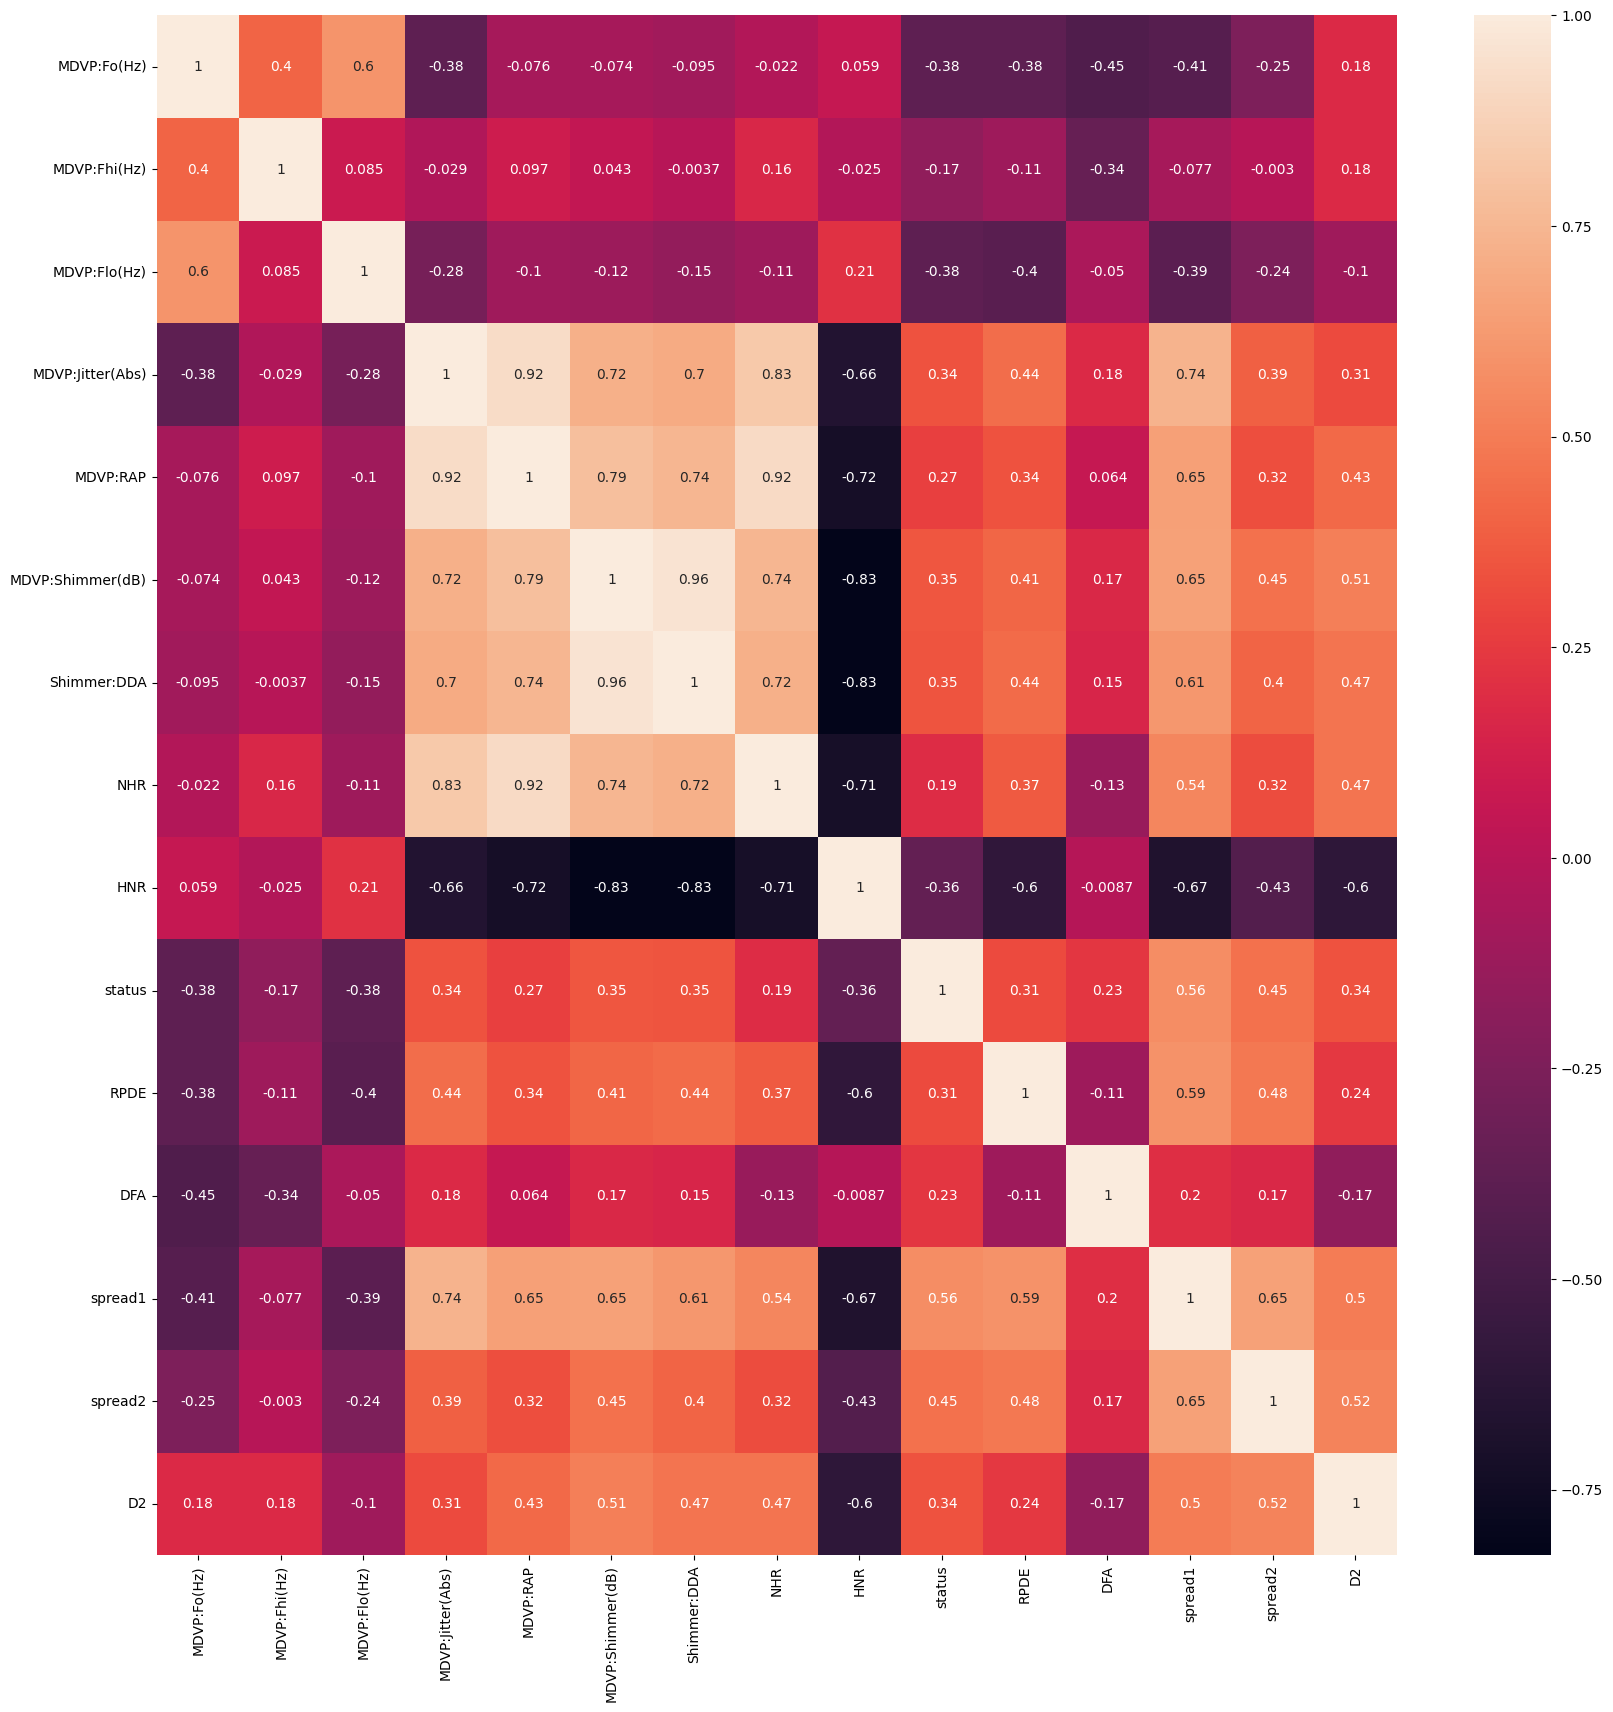

In [138]:
#data preparation

data = data.drop(['Shimmer:APQ3','MDVP:Shimmer','Shimmer:APQ5','MDVP:APQ','MDVP:Jitter(%)','MDVP:PPQ','Jitter:DDP','PPE'],axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(data.drop('name',axis=1).corr(),annot=True)

In [139]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:RAP,MDVP:Shimmer(dB),Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2
0,phon_R01_S01_1,119.992,157.302,74.997,0.00007,0.00370,0.426,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,phon_R01_S01_2,122.400,148.650,113.819,0.00008,0.00465,0.626,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855
2,phon_R01_S01_3,116.682,131.111,111.555,0.00009,0.00544,0.482,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259
3,phon_R01_S01_4,116.676,137.871,111.366,0.00009,0.00502,0.517,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554
4,phon_R01_S01_5,116.014,141.781,110.655,0.00011,0.00655,0.584,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00003,0.00263,0.405,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476
191,phon_R01_S50_3,209.516,253.017,89.488,0.00003,0.00331,0.263,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312
192,phon_R01_S50_4,174.688,240.005,74.287,0.00008,0.00624,0.256,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772
193,phon_R01_S50_5,198.764,396.961,74.904,0.00004,0.00370,0.241,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608


In [140]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:Shimmer(dB)', 'Shimmer:DDA',
       'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2'],
      dtype='object')

In [141]:

x=data.drop(['status','name'],axis=1)
y=data['status']
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:RAP,MDVP:Shimmer(dB),Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.00007,0.00370,0.426,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00008,0.00465,0.626,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.00009,0.00544,0.482,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00009,0.00502,0.517,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.00011,0.00655,0.584,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00003,0.00263,0.405,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476
191,209.516,253.017,89.488,0.00003,0.00331,0.263,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312
192,174.688,240.005,74.287,0.00008,0.00624,0.256,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772
193,198.764,396.961,74.904,0.00004,0.00370,0.241,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608


In [142]:
#detecting the label imbalance

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print(Counter(y))

Counter({1: 147, 0: 48})


In [143]:
#correcting the imbalance

r=RandomOverSampler()
x_r,y_r=r.fit_resample(x,y)
print(Counter(y_r))

Counter({1: 147, 0: 147})


In [144]:
#scaling

sc=MinMaxScaler((-1,1))
x=sc.fit_transform(x_r)
y=y_r

In [145]:
# #Feature engineering

# from sklearn.decomposition import PCA
# pca=PCA(.95)
# x_PCA=pca.fit_transform(x)
# print(x.shape)
# print(x_PCA.shape)

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=7)

In [147]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
met_list=[]
acc_list=[]

#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
train1=lr.fit(x_train,y_train)
y_predict1=lr.predict(x_test)
acc_lr=accuracy_score(y_test,y_predict1)

In [148]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=14)
train2=dt.fit(x_train,y_train)
y_predict2=dt.predict(x_test)
acc_dt=accuracy_score(y_test,y_predict2)

In [149]:
#random forest (information gain)

from sklearn.ensemble import RandomForestClassifier

rfi=RandomForestClassifier(random_state=14)
train3=rfi.fit(x_train,y_train)
y_predict3=rfi.predict(x_test)
acc_rfi=accuracy_score(y_test,y_predict3)

In [150]:
#random forest (entropy)

from sklearn.ensemble import RandomForestClassifier

rfe=RandomForestClassifier(criterion='entropy')
train4=rfe.fit(x_train,y_train)
y_predict4=rfe.predict(x_test)
acc_rfe=accuracy_score(y_test,y_predict4)


In [151]:
#SVM
from sklearn.svm import SVC

svm=SVC(cache_size=100)
train5=svm.fit(x_train,y_train)
y_predict5=svm.predict(x_test)
acc_svm=accuracy_score(y_test,y_predict5)


In [152]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
train6=knn.fit(x_train,y_train)
y_predict6=knn.predict(x_test)
acc_knn=accuracy_score(y_test,y_predict6)

In [153]:
#Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
train7=gnb.fit(x_train,y_train)
y_predict7=gnb.predict(x_test)
acc_gnb=accuracy_score(y_test,y_predict7)

In [154]:
#Bernoulli Naive Bayes

from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
train8=bnb.fit(x_train,y_train)
y_predict8=bnb.predict(x_test)
acc_bnb=accuracy_score(y_test,y_predict8)

In [155]:
#voting classifier(Bagging algorithm)

from sklearn.ensemble import VotingClassifier

vc=VotingClassifier(estimators=[('lr',lr),('rfi',rfi),('rfe',rfe),('dt',dt),('svm',svm),('knn',knn),('gnb',gnb),('bnb',bnb)],voting='hard',flatten_transform=True)
train_final=vc.fit(x_train,y_train)
y_predict_final=vc.predict(x_test)
acc_vc=accuracy_score(y_test,y_predict_final)

                             Method  Accuracy
0               Logistic Regression  0.694915
1                     Decision Tree  0.898305
2  Random Foreset(information gain)  0.949153
3            Random Forest(Entropy)  0.949153
4                               SVM  0.932203
5                               KNN  0.983051
6                               gnb  0.830508
7                               bnb  0.813559
8                                vc  0.932203
Axes(0.125,0.11;0.775x0.77)


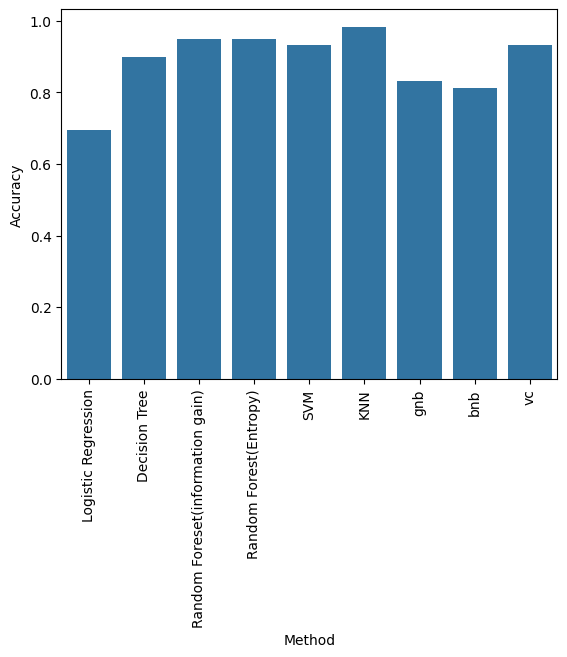

In [156]:
list1=['Logistic Regression','Decision Tree','Random Foreset(information gain)','Random Forest(Entropy)','SVM','KNN','gnb','bnb','vc']
list2=[acc_lr,acc_dt,acc_rfi,acc_rfe,acc_svm,acc_knn,acc_gnb,acc_bnb,acc_vc]
list3=[lr,dt,rfi,rfe,svm,knn,gnb,vc]

data_accuracy=pd.DataFrame({'Method':list1,'Accuracy':list2})
print(data_accuracy)
chart=sns.barplot(x='Method',y='Accuracy',data=data_accuracy)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
print(chart)

In [157]:
#xg boost
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

94.91525423728814


In [158]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_pred)

In [159]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.9577464788732395

In [160]:
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print('confusion matirx:')
print(c)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.94      0.97      0.96        35

    accuracy                           0.95        59
   macro avg       0.95      0.94      0.95        59
weighted avg       0.95      0.95      0.95        59

confusion matirx:
[[22  2]
 [ 1 34]]


In [161]:
for i in list3:
    print('\n',i,'\n')
    print(classification_report(y_test,i.predict(x_test)))
    print('confusion matrix:')
    print(confusion_matrix(y_test,i.predict(x_test)),'\n')


 LogisticRegression(C=0.4, max_iter=1000, solver='liblinear') 

              precision    recall  f1-score   support

           0       0.65      0.54      0.59        24
           1       0.72      0.80      0.76        35

    accuracy                           0.69        59
   macro avg       0.68      0.67      0.67        59
weighted avg       0.69      0.69      0.69        59

confusion matrix:
[[13 11]
 [ 7 28]] 


 DecisionTreeClassifier(random_state=14) 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.91      0.91      0.91        35

    accuracy                           0.90        59
   macro avg       0.89      0.89      0.89        59
weighted avg       0.90      0.90      0.90        59

confusion matrix:
[[21  3]
 [ 3 32]] 


 RandomForestClassifier(random_state=14) 

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
      

In [162]:
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score

def roc(model,x_test,y_test):
    prob=model.predict_proba(np.array(x_test))
    pred=prob
    fpr,tpr,threshold=roc_curve(y_test,pred[:,1])
    roc_auc=auc(fpr,tpr)
    
    plt.title('ROC')
    plt.plot(fpr,tpr,'g',label='AUC=%.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('true positive rate')
    plt.xlabel('false positive rate')
    plt.show()

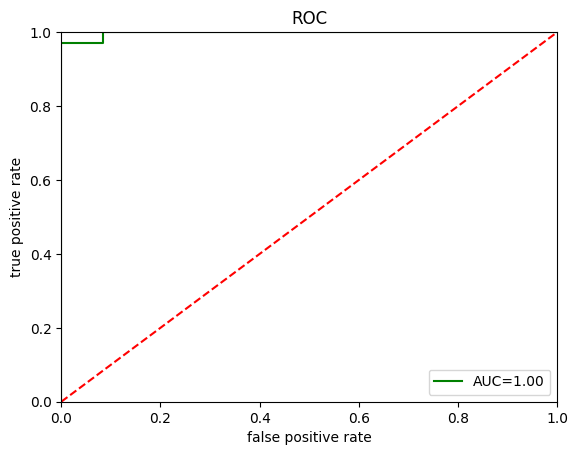

In [163]:
roc(xg,x_test,y_test)


 roc for Logistic Regression with pca


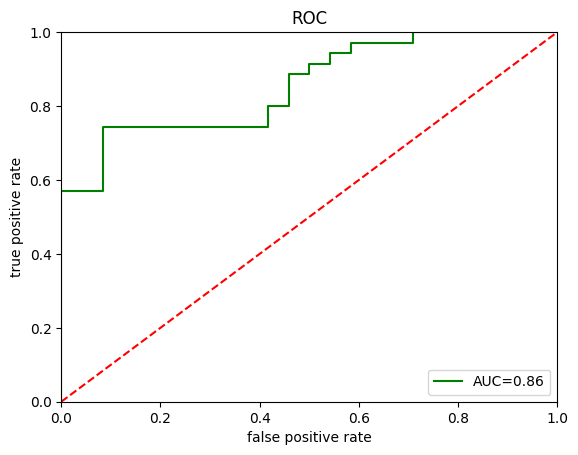



 roc for Decision Tree with pca


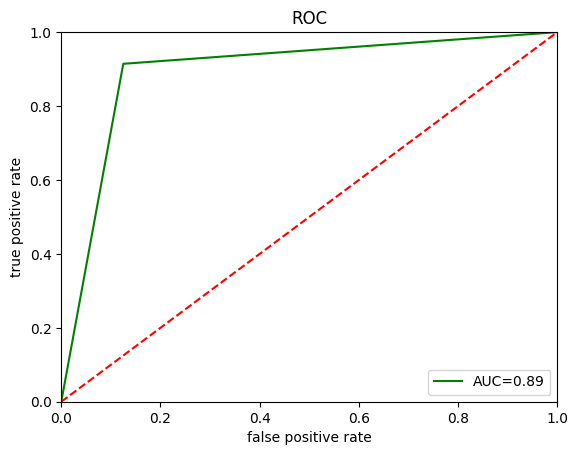



 roc for Random Foreset(information gain) with pca


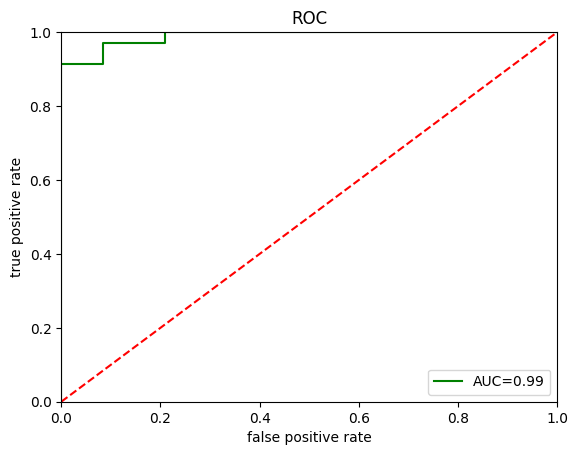



 roc for Random Forest(Entropy) with pca


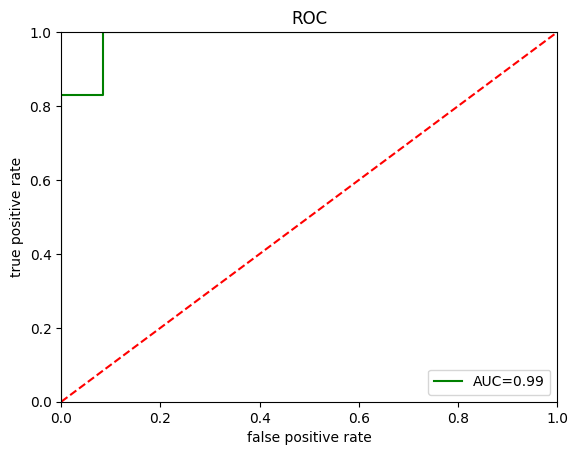



 roc for SVM with pca
no valid roc

 roc for KNN with pca


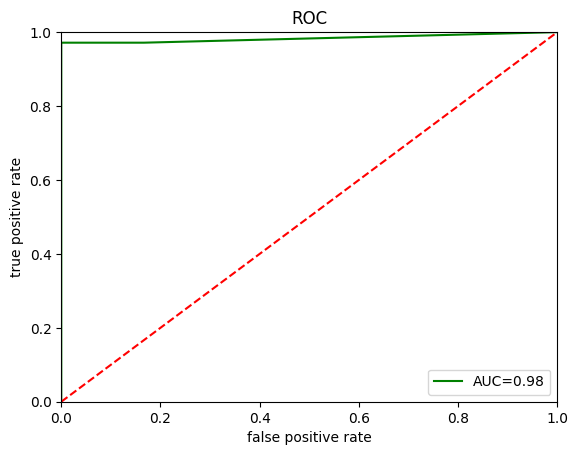



 roc for gnb with pca


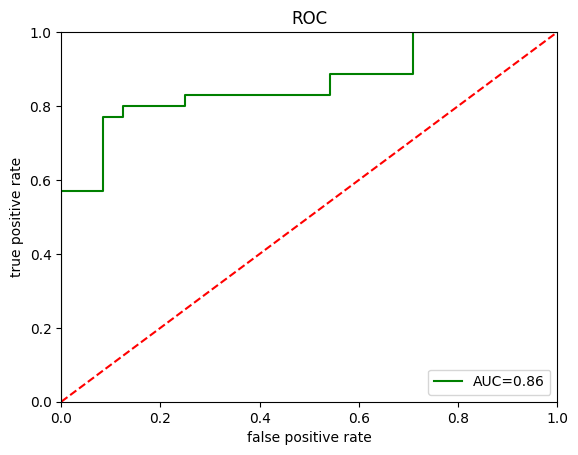



 roc for bnb with pca
no valid roc


In [164]:
for i in range(0,len(list3)):
    try:
        print('\n','roc for',list1[i],'with pca')
        roc(list3[i],x_test,y_test)
        print()
    except:
        print("no valid roc")

In [165]:
import pickle
pickle.dump(knn,open("model.pkl","wb"))